# Enter Clustering

Machine Learning is divided into three main categories:

## Supervised Learning

- all data used is labelled (with ground truth information)
- the algorithm is provided direct feedback
- the algorithm is meant to predict outcome


### Classification

<p><a href="https://commons.wikimedia.org/wiki/File:Svm_separating_hyperplanes.png#/media/File:Svm_separating_hyperplanes.png"><img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png" alt="Svm separating hyperplanes.png" width="503" height="480"></a><br>By &lt;a href="//commons.wikimedia.org/w/index.php?title=User:Cyc&amp;amp;action=edit&amp;amp;redlink=1" class="new" title="User:Cyc (page does not exist)"&gt;Cyc&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=3566969">Link</a></p>



### Regression

![from commons.wikimedia.org](https://commons.wikimedia.org/wiki/File:Linear_regression.svg#/media/File:Linear_regression.svg)



## Unsupervised Learning

- there are **NO** labels (with ground truth information)
- no feedback is provided to the algorithm
- goal: find hidden structure in data

<p><a href="https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg#/media/File:KMeans-Gaussian-data.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/KMeans-Gaussian-data.svg/1200px-KMeans-Gaussian-data.svg.png" alt="KMeans-Gaussian-data.svg"></a><br>By &lt;a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire"&gt;Chire&lt;/a&gt; - &lt;span class="int-own-work" lang="en"&gt;Own work&lt;/span&gt;, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=17085714">Link</a></p>

## Reinforcement Learning

- model a decision process
- reward system
- learn series of actions

# Important Notation 

- we are given a dataset of size $n$ as 

$\mathcal{D} = \{ \langle \vec{x}, y \rangle_{i}, i = 1, \dots, n \} $

- the data represents a mapping: 

$f(\vec{x}) = y$

- machine learning produces a hypothesis: 

$h(\vec{x}) = \hat{y}$

## classification versus regression

- classification: 

$h : \mathcal{R}^n \rightarrow \mathcal{Z} $ 

(e.g. for 3 categories ${0,1,2}$)

- regression: 

$h : \mathcal{R}^n \rightarrow \mathcal{R} $ (regression can also produce $\mathcal{R}^{n}$


# Data

For the following, I will rely on the Palmer penguin dataset obtained from [this repo](https://github.com/allisonhorst/palmerpenguins). To quote the repo:

> Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php)
> and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).


In [2]:
import pandas as pd
print("pandas version:", pd.__version__)


pandas version: 1.0.5


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
print(df.head())
print(df.tail())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  
       species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210

In [4]:
#let's remove the rows with NaN values
df = df[ df.bill_length_mm.notnull() ]

print("after cleaning:")
print(df.head())


after cleaning
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  


In [5]:
print(df.shape)
print(df.dtypes)
print(">> columns species, island and sex are encoded as strings!")

(342, 8)
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object
>> columns species, island and sex are encoded as strings


In [6]:
df[["species_"]] = df[["species"]].astype("category")
print(df[["species_"]].head())
print(df.species_.cat.codes.head())

  species_
0   Adelie
1   Adelie
2   Adelie
4   Adelie
5   Adelie
0    0
1    0
2    0
4    0
5    0
dtype: int8


In [97]:
print("make sure the categories are correctly encoded:\n")
print(pd.unique(df.species_))
print(pd.unique(df.species_.cat.codes))


make sure the categories are correctly encoded
[Adelie, Gentoo, Chinstrap]
Categories (3, object): [Adelie, Gentoo, Chinstrap]
[0 2 1]


There are 3 types of penguins in this dataset: 

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png)



Important feature columns are:

![Artwork by @allison_horst](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/culmen_depth.png)

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [11]:
#to make out lives a bit easier, let's use a wrapper library for matplotlib
import seaborn as sns
print(f'seaborn version: {sns.__version__}')

seaborn version: 0.10.1


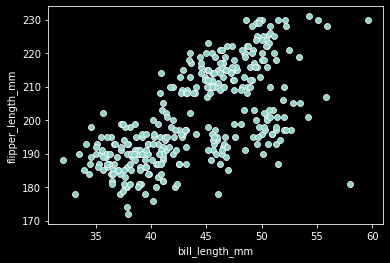

In [12]:
#we want to cluster the penguins and work towards a classification using this
sns.scatterplot(x=df.bill_length_mm, y=df.flipper_length_mm, palette="husl")
plt.show()

# nearest neighbors clustering

## Problem

- we already know that our dataset consists of 3 classes: `Adelie, Gentoo, Chinstrap`
- let's assume with **DO NOT** have the correct class label for each row


## Task 
- given this dataset 
$\mathcal{D} = \{ \langle \vec{x} \rangle_{i}, i = 1, \dots, n \} $
- find the $k=3$ clusters to which any of the known points belong to!



## Analysis

- basis algorithm: finding the nearest point for a query `x_q` given a reference `dataset`
  
```
def bruteforce_nearest_neighbor( x_q, dataset):
   closest_point = None
   closest_distance = infinity
   
   for i in range(n):
     x_i = dataset[i]
     current_distance = distance(x_i, x_q)
     if current_distance < closest_distance:
       closest_distance = current_distance
       closest_point = x_i
       
   return closest_point
```

- most common distance metric: Euclidean Distance $d(\vec{x}_a, \vec{x}_b) = \sqrt{ \sum_{j=1}^{m} (x_{j,a} - x_{j,b})^2 }$
- price: 
  + keep entire "training set" in memory
  + for each query point, go through entire dataset again (`bruteforce`)
  

### Naive Clustering / Llyod's algorithm

goal: create $k$ sets $S$ such as $argmin_{S} \sum^{k}_{i=1} \sum_{\vec{x} \in S_i} || \vec{x} - \vec{\mu}_i ||^2$


algorithm:

1. select $k$ points at random and assign them a cluster_id
   (consider these points to be the __mean__ of the cluster)
 
![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/249px-K_Means_Example_Step_1.svg.png)
   
2. assign samples closest to a given cluster mean/centroid so that the variance of the cluster remains minimal

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/278px-K_Means_Example_Step_2.svg.png)

3. calculate the distance of all points to those cluster means (also called centroids) and update the mean cluster centroid for each cluster

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/278px-K_Means_Example_Step_3.svg.png)

4. Steps 2 and 3 are repeated until convergence has been reached, i.e. the cluster association does not change anymore.

![by Weston.pace, from commons.wikimedia.org under CC-BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/278px-K_Means_Example_Step_4.svg.png)

In [13]:
import sklearn.cluster as skl_cluster
import numpy as np

kmeans = skl_cluster.KMeans(n_clusters=3, init='random')

data = np.stack((df.bill_length_mm, df.flipper_length_mm), axis=-1)

kmeans = kmeans.fit(data)


array([[ 47.56744186, 216.88372093],
       [ 45.95483871, 196.7311828 ],
       [ 38.4275    , 186.99166667]])

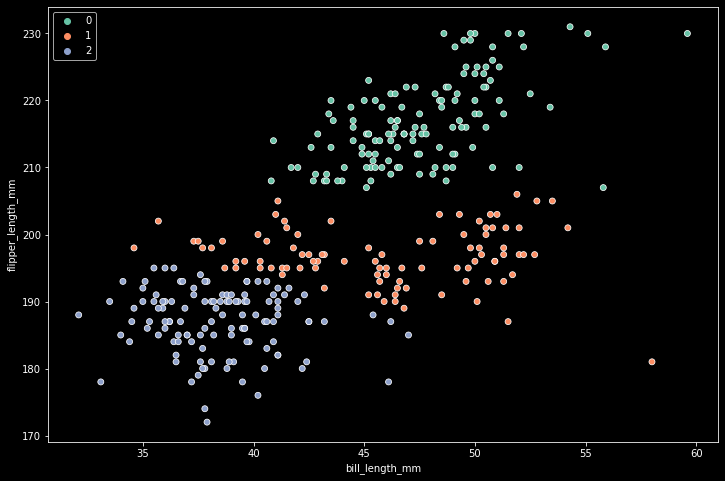

In [14]:
#let's see which clusters have been found
fig, ax = plt.subplots(1, figsize=(12,8))
sns.scatterplot(ax=ax,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=kmeans.labels_,
                palette="Set2")

kmeans.cluster_centers_

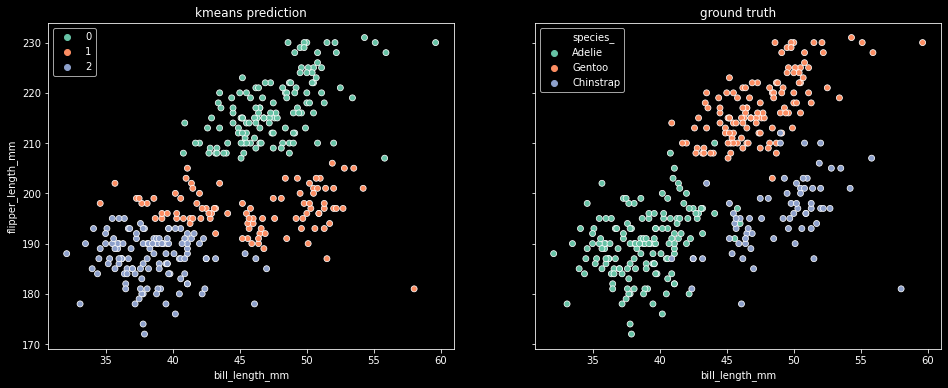

In [15]:
#let's compare to the real labels
fig, (left, right) = plt.subplots(1,2,figsize=(16,6), sharey = True, sharex=False)

sns.scatterplot(ax=left,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=kmeans.labels_,
                palette="Set2")
left = left.set_title("kmeans prediction")

sns.scatterplot(ax=right,
                x=df.bill_length_mm,
                y=df.flipper_length_mm,
                hue=df.species_,
                palette="Set2")
right = right.set_title("ground truth")



# Conclusions

- machine learning can be divided into 3 main categories: supervised learning, unsupervised learning, reinforcement learning

- unsupervised learning should be used to uncover hidden structure in data sets
    - it is useful if true labels/annotations are not available
    - kmeans clustering is one of the most widespread unsupervised algorithms available
    
- kmeans clustering works by creating cluster associations that minimize the cluster variance (similar to least squares regression)
    - if separation of clusters is not clear (they overlap), kmeans struggles
    - inteligent search algorithms are put to use to accelerate kmeans (among other aspects)